In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math
#from tensorflow import keras
from datetime import datetime
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import smtplib
from email.message import EmailMessage
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy.matlib
pd.options.mode.chained_assignment = None  # default='warn
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, RepeatVector, TimeDistributed, BatchNormalization, Convolution2D, MaxPooling2D, Flatten, Conv1D, MaxPooling1D, Input, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, CSVLogger, LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import Huber, MeanSquaredError
from tensorflow.keras.regularizers import l2
from time import time
import itertools
import random

import os
from sklearn.metrics import classification_report


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/CC5220/Data.csv",index_col=0)

In [ ]:
df

,date,Dry_Bulb_Temp,Wet_Bulb_Temp,Dew_Point_Temp,R_H,Vapor_Pressure,Wind_Speed,Total_Amount_cloud,Daily_Min_Temp,Sunshine_Hours,Amt_Individual_Layer_Cloud,Evaporation,Daily_Max_Temp,Total_Rainfall
0,1969-01-01,20.00,18.80,18.150,89.50,20.850,9.0,5.50,19.2,9.5,429.50,12.000000,23.6,9.0
1,1969-01-02,18.50,18.10,17.900,96.00,20.500,1.0,5.00,16.7,8.0,639.00,41.500000,28.7,8.0
2,1969-01-03,20.50,18.70,17.700,84.00,20.250,6.0,4.50,17.5,9.8,917.00,70.000000,28.5,4.0
3,1969-01-04,19.70,17.00,15.350,76.00,17.450,12.0,1.50,17.8,9.5,916.50,79.500000,29.7,3.0
4,1969-01-05,19.30,17.70,16.800,85.50,19.150,7.0,3.50,16.0,10.0,653.50,34.000000,28.4,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18807,2021-11-26,24.85,18.65,14.825,55.75,16.975,0.0,2.25,17.2,8.1,378.25,40.000000,32.2,5.0
18808,2021-11-27,22.40,17.95,15.250,66.00,17.375,1.0,4.25,16.9,9.0,740.25,42.500000,31.0,11.0
18809,2021-11-28,24.30,19.20,16.200,61.75,18.575,1.0,6.50,18.3,5.4,844.75,49.500000,29.6,19.0
18810,2021-11-29,23.30,19.45,17.325,69.50,19.800,6.0,6.00,20.9,5.5,741.50,42.500000,29.3,16.0


In [ ]:
df.set_index('date',inplace=True)
df_train=df[:-30]
df_test=df[-30:]
y = df_train['Total_Rainfall']



In [ ]:
y = y.values.reshape(-1, 1)

# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
y = scaler.transform(y)

# generate the input and output sequences
n_lookback = 10  # length of input sequences (lookback period)
n_forecast = 5 # length of output sequences (forecast period)

X = []
Y = []

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)


In [ ]:
print(X.shape,Y.shape)

(18768, 10, 1) (18768, 5, 1)


Epoch 1/45
261/261 - 11s - loss: 0.1306 - 11s/epoch - 44ms/step
Epoch 2/45
261/261 - 2s - loss: 0.1243 - 2s/epoch - 6ms/step
Epoch 3/45
261/261 - 1s - loss: 0.1212 - 1s/epoch - 5ms/step
Epoch 4/45
261/261 - 1s - loss: 0.1199 - 1s/epoch - 5ms/step
Epoch 5/45
261/261 - 1s - loss: 0.1194 - 1s/epoch - 5ms/step
Epoch 6/45
261/261 - 1s - loss: 0.1190 - 1s/epoch - 5ms/step
Epoch 7/45
261/261 - 1s - loss: 0.1188 - 1s/epoch - 5ms/step
Epoch 8/45
261/261 - 1s - loss: 0.1186 - 1s/epoch - 5ms/step
Epoch 9/45
261/261 - 1s - loss: 0.1185 - 1s/epoch - 5ms/step
Epoch 10/45
261/261 - 2s - loss: 0.1183 - 2s/epoch - 7ms/step
Epoch 11/45
261/261 - 2s - loss: 0.1182 - 2s/epoch - 7ms/step
Epoch 12/45
261/261 - 1s - loss: 0.1181 - 1s/epoch - 5ms/step
Epoch 13/45
261/261 - 1s - loss: 0.1181 - 1s/epoch - 5ms/step
Epoch 14/45
261/261 - 1s - loss: 0.1180 - 1s/epoch - 5ms/step
Epoch 15/45
261/261 - 1s - loss: 0.1180 - 1s/epoch - 5ms/step
Epoch 16/45
261/261 - 1s - loss: 0.1179 - 1s/epoch - 5ms/step
Epoch 17/45
26

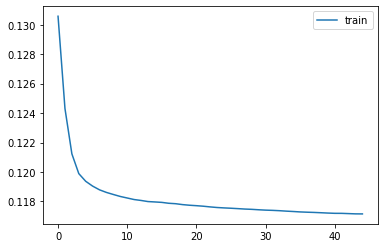

In [ ]:

# fit the model
model = Sequential()
model.add(LSTM(units=120,return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(40))
model.add(Dense(n_forecast))

model.compile(loss='mae', optimizer='adam')
history=model.fit(X, Y, epochs=45, batch_size=72, verbose=2,shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()


1/1 [==============================] - 1s 851ms/step


<Axes: xlabel='Date'>

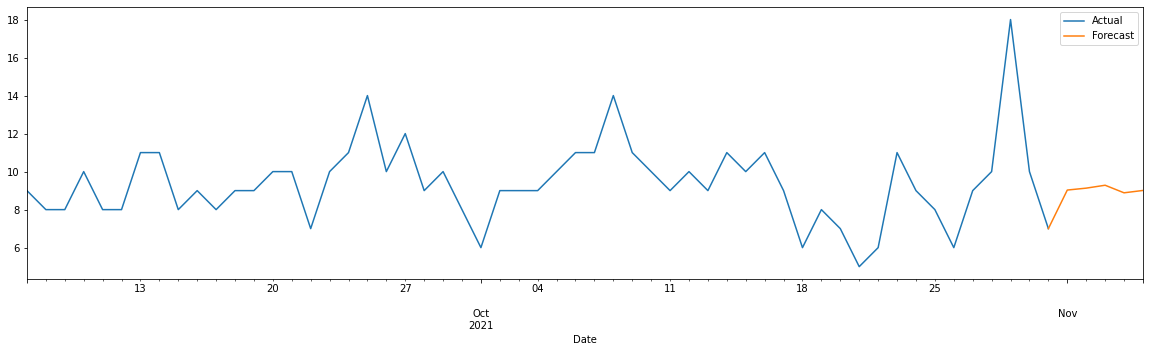

In [ ]:
# generate the forecasts
X_ = y[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)

# organize the results in a data frame
df_past = df_train[['Total_Rainfall']].reset_index()
df_past.rename(columns={'date': 'Date', 'Total_Rainfall': 'Actual'}, inplace=True)
df_past['Date'] = pd.to_datetime(df_past['Date'])
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
df_future['Forecast'] = Y_.flatten()
df_future['Actual'] = np.nan

results = df_past.append(df_future).set_index('Date')
results[-60:].plot(figsize=(20,5))

In [ ]:
t=df_test.iloc[:5]['Total_Rainfall'].values
t

array([10., 10.,  7., 13., 11.])

In [ ]:
f=results.iloc[-5:]['Forecast'].values
f

array([9.02960491, 9.13029861, 9.2831192 , 8.88461685, 9.00830269])

date
2021-11-01    10.0
2021-11-02    10.0
2021-11-03     7.0
2021-11-04    13.0
2021-11-05    11.0
Name: Total_Rainfall, dtype: float64

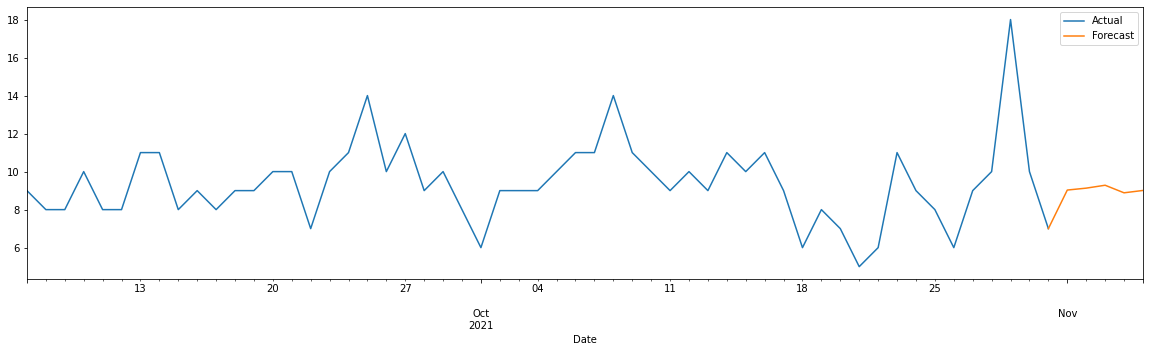

In [ ]:
results.iloc[-5:]['Actual']=df_test.iloc[:5]['Total_Rainfall']

In [ ]:
from sklearn.metrics import mean_squared_error
print("RMSE:",np.sqrt(mean_squared_error(results.iloc[-5:]['Forecast'].values,df_test.iloc[:5]['Total_Rainfall'].values)))
from sklearn.metrics import mean_absolute_error
print("MAE:",mean_absolute_error(results.iloc[-5:]['Forecast'].values,df_test.iloc[:5]['Total_Rainfall'].values))
from sklearn.metrics import mean_absolute_percentage_error
print("MAPE:",mean_absolute_percentage_error(results.iloc[-5:]['Forecast'].values,df_test.iloc[:5]['Total_Rainfall'].values))


RMSE: 2.270372105979733
MAE: 1.9292242050170898
MAPE: 0.2119015835824351


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 120)           58560     
                                                                 
 lstm_1 (LSTM)               (None, 40)                25760     
                                                                 
 dense (Dense)               (None, 5)                 205       
                                                                 
Total params: 84,525
Trainable params: 84,525
Non-trainable params: 0
_________________________________________________________________
